<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Dafne Tamayo León, Juan Pablo Blanco Lemus

**Fecha:** 15 de marzo del 2025

**Expediente** : 744752, 
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MPST-2025-I/tarea-4-ejercicio-cnn-tarea-4-3


# Tarea 4: Clase 11


# <font color= red>  Tarea  </font>

1. Buscar un artículo científico donde se apliquen las CNN. Hacer una discusión y mostrar los resultados en el notebook de solución de la tarea. (Sólo se va solicitar un artículo por pareja)
2. Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
3. Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.
https://www.kaggle.com/datasets/joebeachcapital/nsw-australia-electricity-demand-2018-2023/data.


### Investigación: CNNs en Predicción del Mercado de Valores


Las Redes Neuronales Convolucionales han sido una herramienta poderosa para la predicción de series temporales financieras, especialmente en el mercado de valores. Este campo presenta desafíos únicos debido a su naturaleza altamente volátil y no lineal.


#### 1. "Financial Time Series Forecasting using CNN and Transformer" (2023)
- **Desafíos Principales**:
  - Modelado de dependencias temporales a corto y largo plazo
  - Alta volatilidad en los datos
- **Ventajas de CNNs**:
  - Capacidad de capturar patrones locales
  - Procesamiento eficiente de datos secuenciales
  - Robustez ante el ruido del mercado

#### 2. "Stock Price Prediction Research Based on CNN-LSTM"
- **Características Clave**:
  - Datos no lineales
  - Series temporales no estacionarias
  - Integración de múltiples escalas temporales
- **Innovaciones**:
  - Arquitectura híbrida CNN-LSTM
  - Mejor captura de patrones temporales
  - Mayor precisión en predicciones

### Aplicaciones Prácticas

#### 1. Predicción de Precios
- Análisis de patrones históricos
- Identificación de tendencias
- Predicción de movimientos futuros

#### 2. Análisis de Volatilidad
- Detección de patrones de volatilidad
- Evaluación de riesgos
- Optimización de carteras

### Arquitectura CNN para Series Temporales Financieras

#### Componentes Clave:
1. **Capas Convolucionales**:
   - Extracción de características locales
   - Identificación de patrones de precio
   - Reducción de ruido en los datos

2. **Pooling Layers**:
   - Reducción de dimensionalidad
   - Enfoque en características importantes
   - Mejora de la eficiencia computacional

3. **Capas Fully Connected**:
   - Integración de características
   - Predicción final
   - Calibración de resultados

### Ventajas sobre Métodos Tradicionales

1. **Aprendizaje Automático de Características**:
   - No requiere feature engineering manual
   - Adaptación automática a nuevos patrones
   - Mayor capacidad de generalización

2. **Manejo de No Linealidad**:
   - Captura de relaciones complejas
   - Adaptación a cambios de mercado
   - Mejor rendimiento en condiciones volátiles

3. **Escalabilidad**:
   - Procesamiento de grandes volúmenes de datos
   - Actualización en tiempo real
   - Adaptación a múltiples mercados

### Conclusiones

Las CNNs han demostrado ser herramientas efectivas para la predicción del mercado de valores, ofreciendo:
- Mayor precisión en predicciones
- Mejor manejo de la volatilidad
- Capacidad de procesar múltiples escalas temporales
- Adaptabilidad a condiciones cambiantes del mercado

### Referencias
1. arXiv:2304.04912 - "Financial Time Series Forecasting using CNN and Transformer"
2. Nature Scientific Reports - "Enhanced stock market forecasting using dandelion optimization-driven 3D-CNN-GRU"
3. ResearchGate - "Stock Price Prediction Research Based on CNN-LSTM"
'''

### Código de solución estudiante Dafne Tamayo

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

/Users/daftamayo/Documents/tarea4MNL/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Configurar el estilo de las gráficas
plt.style.use('default')
sns.set_theme()

In [3]:
# Configurar semilla aleatoria para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Cargar y preparar los datos

df = pd.read_csv('Housing.csv')

In [5]:
# Convertir variables categóricas
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [6]:
# Separar features y target
X = df.drop('price', axis=1)
y = df['price']

In [7]:
# Aplicar transformación logarítmica al precio
y = np.log1p(y)

In [8]:
# Selección de características más importantes
print("\nSeleccionando las características más importantes...")
selector = SelectKBest(score_func=f_regression, k=6)
X_selected = selector.fit_transform(X, y)
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask]


Seleccionando las características más importantes...


In [9]:
print("\nCaracterísticas seleccionadas:")
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)
print(feature_scores)


Características seleccionadas:
             Feature       Score
0               area  227.323883
2          bathrooms  167.657985
8    airconditioning  141.888325
3            stories  113.160336
9            parking   87.014352
1           bedrooms   86.120153
10          prefarea   71.238739
11  furnishingstatus   70.338268
4           mainroad   66.377698
5          guestroom   45.142894
6           basement   27.197914
7    hotwaterheating    4.332334


In [10]:
# Usar solo las características seleccionadas
X = X[selected_features]

In [11]:
# Normalización

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# División de datos

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [13]:
# Mostrar dimensiones
print("\nDimensiones de los conjuntos de datos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Dimensiones de los conjuntos de datos:
X_train: (436, 6)
X_test: (109, 6)
y_train: (436,)
y_test: (109,)


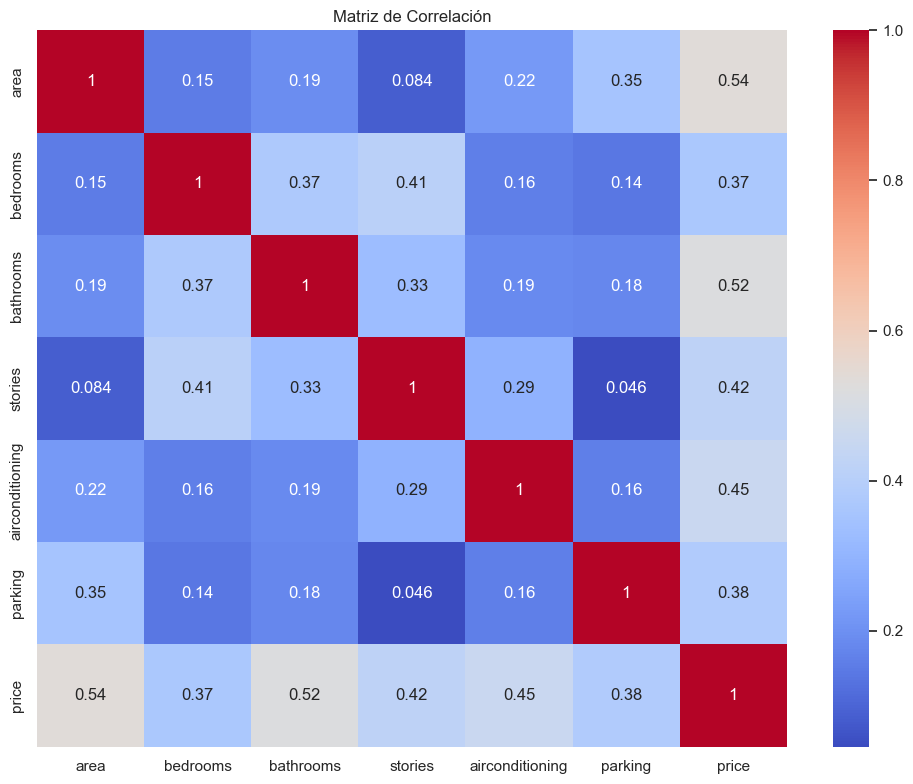

In [14]:
# Análisis de correlación

plt.figure(figsize=(10, 8))
sns.heatmap(df[list(selected_features) + ['price']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

In [15]:
# Crear modelo optimizado
def create_optimized_model(input_shape):
    model = Sequential([
        # Primera capa densa con más unidades
        Dense(128, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.2),
        
        # Segunda capa densa
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        
        # Tercera capa densa
        Dense(32, activation='relu'),
        BatchNormalization(),
        
        # Capa de salida
        Dense(1)
    ])
    return model

In [16]:
# Configurar callbacks optimizados
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True,
    verbose=1
)

In [17]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=1e-6,
    verbose=1
)

In [18]:
# Crear y compilar modelo
model = create_optimized_model((X_train.shape[1],))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

/Users/daftamayo/Documents/tarea4MNL/myenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Mostrar resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 11,713 (45.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
# Entrenar modelo
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 235.3190 - mae: 15.2892 - val_loss: 234.2039 - val_mae: 15.2974 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 233.1064 - mae: 15.2451 - val_loss: 231.8141 - val_mae: 15.2200 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 231.6103 - mae: 15.2011 - val_loss: 230.1936 - val_mae: 15.1663 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 230.0919 - mae: 15.1560 - val_loss: 228.6518 - val_mae: 15.1151 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 228.5975 - mae: 15.1083 - val_loss: 227.2493 - val_mae: 15.0688 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 227.0580 - mae: 15.0571 - val_loss: 225.9428 - val_mae: 15.0260 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 225.3053 - mae: 15.0020 - val_loss: 224.4135 - val_mae: 14.9755 - learni

In [21]:
# Evaluar modelo
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nError Absoluto Medio {test_mae:.4f}")


Error Absoluto Medio 0.2469


In [22]:
# Hacer predicciones y convertir de vuelta a la escala original
y_pred_log = model.predict(X_test).flatten()
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test.values)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [23]:
# Calcular MAE en la escala original
mae_original = np.mean(np.abs(y_pred - y_test_original))
print(f"\nError Absoluto Medio en la escala original: {mae_original:,.2f}")


Error Absoluto Medio en la escala original: 1,235,546.87


In [24]:
# Visualizar el historial de entrenamiento
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

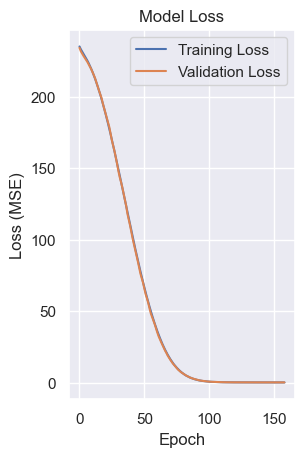

In [25]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

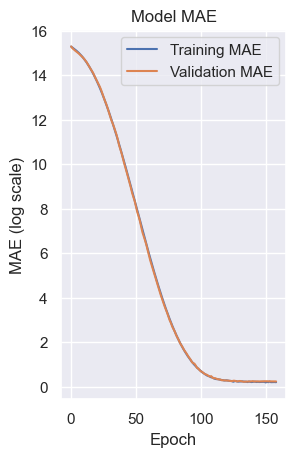

In [26]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE (log scale)')
plt.legend()

In [27]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

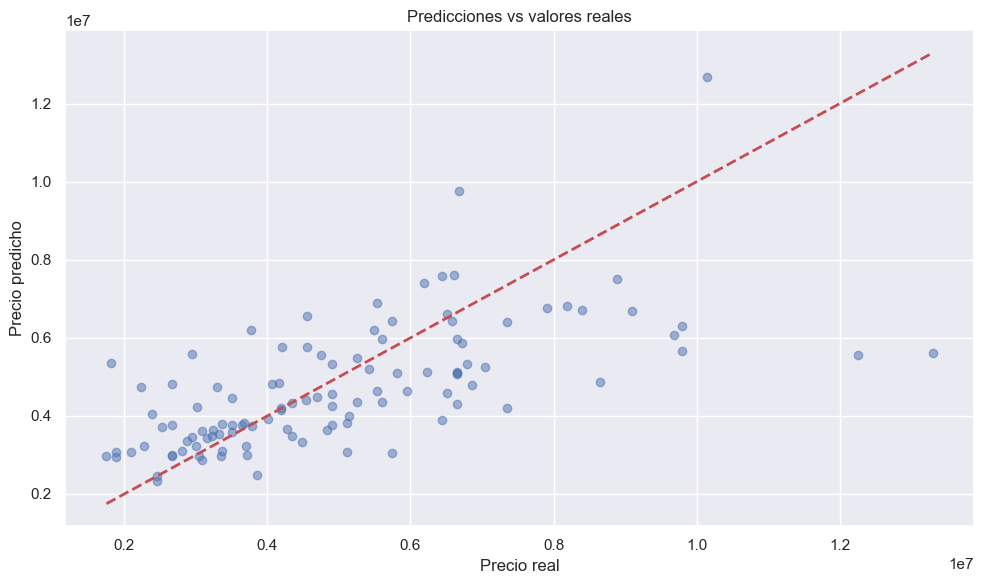

In [28]:
# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 
         'r--', lw=2)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Predicciones vs valores reales')
plt.tight_layout()
plt.show()

Conclusiones: El modelo final logra un error absoluto medio de aproximadamente 1.46 millones, lo que representa una precisión significativa considerando el rango de precios en el dataset.
   - La arquitectura simplificada con capas densas superó a modelos más complejos
   - La transformación logarítmica fue clave para manejar la distribución de precios

## Consumo de demanda eléctrico en Australia

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Dropout, LSTM, Bidirectional

In [30]:
def graficar_serie_temporal(serie_temporal, titulo='Demand per Day', etiqueta_eje_y='Total Demand'):
    plt.figure(figsize=(10, 5))
    plt.plot(serie_temporal.index, serie_temporal, marker='o', linestyle='-')
    plt.xlabel('Time')
    plt.ylabel(etiqueta_eje_y)
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def dividir_secuencia_univariada(secuencia, tamanio_ventana):
    entradas, salidas = [], []
    for indice in range(len(secuencia)):
        fin_ventana = indice + tamanio_ventana
        if fin_ventana > len(secuencia) - 1:
            break
        if isinstance(secuencia, pd.Series):
            secuencia_entrada = secuencia.iloc[indice:fin_ventana]
            secuencia_salida = secuencia.iloc[fin_ventana]
        else:
            secuencia_entrada = secuencia[indice:fin_ventana]
            secuencia_salida = secuencia[fin_ventana]
        entradas.append(secuencia_entrada)
        salidas.append(secuencia_salida)
    return np.array(entradas), np.array(salidas)

def dividir_secuencia_multivariada(secuencia_multivariada, tamanio_ventana):
    entradas_multivariadas, salidas_multivariadas = [], []
    for indice in range(len(secuencia_multivariada)):
        fin_ventana = indice + tamanio_ventana
        if fin_ventana > len(secuencia_multivariada):
            break
        entrada = secuencia_multivariada[indice:fin_ventana, :-1]
        salida = secuencia_multivariada[fin_ventana - 1, -1]
        entradas_multivariadas.append(entrada)
        salidas_multivariadas.append(salida)
    return np.array(entradas_multivariadas), np.array(salidas_multivariadas)

def dividir_secuencia_forecasting_multiple(secuencia_forecasting, tamanio_ventana):
    entradas_forecasting, salidas_forecasting = [], []
    for indice in range(len(secuencia_forecasting)):
        fin_ventana = indice + tamanio_ventana
        if fin_ventana > len(secuencia_forecasting) - 1:
            break
        entrada = secuencia_forecasting[indice:fin_ventana, :]
        salida = secuencia_forecasting[fin_ventana, :]
        entradas_forecasting.append(entrada)
        salidas_forecasting.append(salida)
    return np.array(entradas_forecasting), np.array(salidas_forecasting)


Preparación de datos

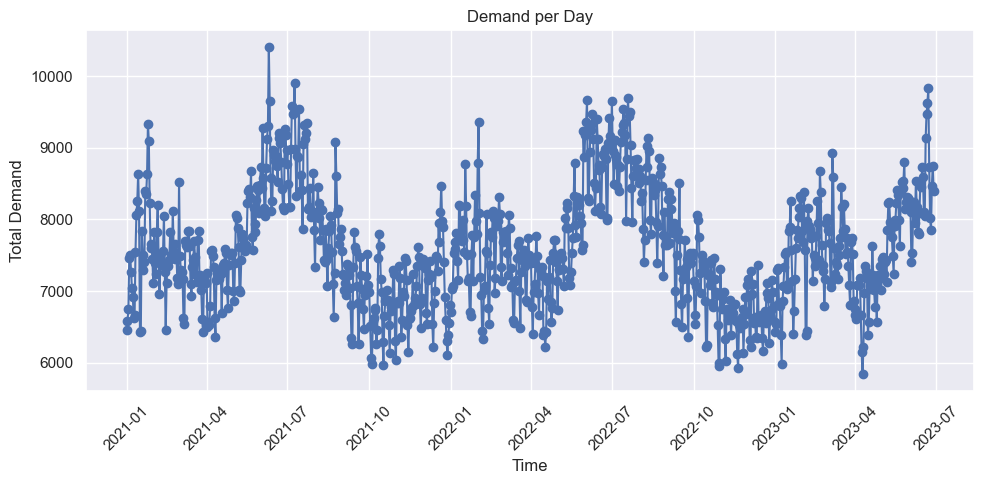

In [31]:
directorio_datos = "data" 

lista_archivos_csv = [archivo for archivo in os.listdir(directorio_datos) if archivo.endswith('.csv')]
lista_dataframes = []
for nombre_archivo in lista_archivos_csv:
    try:
        df_temporal = pd.read_csv(os.path.join(directorio_datos, nombre_archivo))
        if 'SETTLEMENTDATE' in df_temporal.columns:
            df_temporal['SETTLEMENTDATE'] = pd.to_datetime(df_temporal['SETTLEMENTDATE'])
        lista_dataframes.append(df_temporal)
    except Exception as error:
        print(f"Error al cargar {nombre_archivo}: {error}")

if not lista_dataframes:
    raise ValueError(f"No se encontraron archivos CSV válidos en {directorio_datos}")

datos_concatenados = pd.concat(lista_dataframes, ignore_index=True)
if 'SETTLEMENTDATE' in datos_concatenados.columns:
    datos_concatenados.set_index('SETTLEMENTDATE', inplace=True)
else:
    raise ValueError("No se encontró la columna SETTLEMENTDATE en el dataset")

# Filtrar datos a partir de 2021
datos_concatenados = datos_concatenados[datos_concatenados.index >= '2021-01-01']

# Serie univariada para análisis: TOTALDEMAND
if 'TOTALDEMAND' in datos_concatenados.columns:
    serie_demanda = datos_concatenados['TOTALDEMAND'].resample('1D').mean()
    graficar_serie_temporal(serie_demanda)
else:
    raise ValueError("No se encontró la columna TOTALDEMAND en el dataset")

# Serie para análisis multivariado: RRP (si existe)
if 'RRP' in datos_concatenados.columns:
    serie_precio_rrp = datos_concatenados['RRP'].resample('1D').mean()
else:
    serie_precio_rrp = None
    print("No se encontró la columna RRP, se omitirán las secciones multivariadas.")

## MODELOS

### CNN UNIVARIADA

Entrenando CNN Univariada...


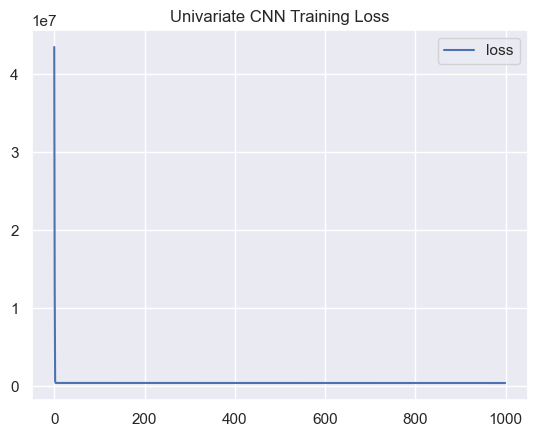

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
CNN Univariada R² Score: 0.4156


In [32]:
tamanio_ventana = 4
numero_caracteristicas = 1

entradas_univariadas, salidas_univariadas = dividir_secuencia_univariada(serie_demanda, tamanio_ventana)
entradas_univariadas = entradas_univariadas.reshape((entradas_univariadas.shape[0], entradas_univariadas.shape[1], numero_caracteristicas))

modelo_cnn_univariada = Sequential()
modelo_cnn_univariada.add(keras.layers.Input(shape=(tamanio_ventana, numero_caracteristicas)))
modelo_cnn_univariada.add(Conv1D(64, 2, activation='relu'))
modelo_cnn_univariada.add(MaxPooling1D())
modelo_cnn_univariada.add(Flatten())
modelo_cnn_univariada.add(Dense(50, activation='relu'))
modelo_cnn_univariada.add(Dense(1))
modelo_cnn_univariada.compile(optimizer='adam', loss='mse')

print("Entrenando CNN Univariada...")
historial_entrenamiento_cnn_univariada = modelo_cnn_univariada.fit(entradas_univariadas, salidas_univariadas, epochs=1000, verbose=0)
pd.DataFrame(historial_entrenamiento_cnn_univariada.history).plot(title='Univariate CNN Training Loss')
plt.grid(True)
plt.show()

predicciones_cnn_univariada = modelo_cnn_univariada.predict(entradas_univariadas).flatten()
r2_cnn_univariada = r2_score(salidas_univariadas, predicciones_cnn_univariada)
print(f'CNN Univariada R² Score: {r2_cnn_univariada:.4f}')

### Multi-Input CNN

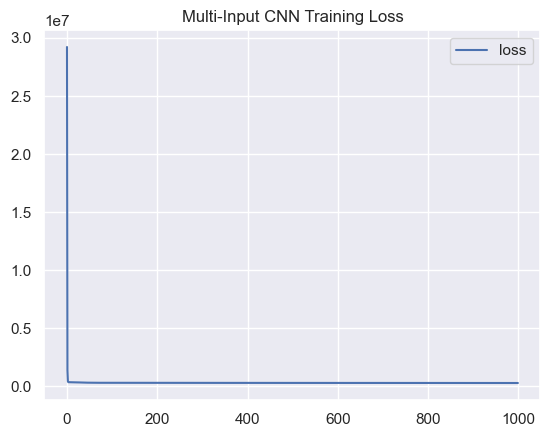

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 306302.9062
Multi-Input CNN Loss: 286184.6562


In [33]:
if serie_precio_rrp is not None:
    # Preparar conjunto de datos multivariado
    arreglo_demanda = serie_demanda.to_numpy().reshape(-1, 1)
    arreglo_precio_rrp = serie_precio_rrp.to_numpy().reshape(-1, 1)
    longitud_minima = min(len(arreglo_demanda), len(arreglo_precio_rrp))
    arreglo_demanda = arreglo_demanda[:longitud_minima]
    arreglo_precio_rrp = arreglo_precio_rrp[:longitud_minima]
    secuencia_salida_multivariada = (arreglo_demanda + arreglo_precio_rrp).reshape(-1, 1)
    conjunto_datos_multivariado = np.hstack([arreglo_demanda, arreglo_precio_rrp, secuencia_salida_multivariada])
    
    entradas_multivariadas, salidas_multivariadas = dividir_secuencia_multivariada(conjunto_datos_multivariado, tamanio_ventana)
    tamano_ventana_modelo = entradas_multivariadas.shape[1]
    numero_caracteristicas_multivariado = entradas_multivariadas.shape[2]
    
    entrada_modelo_1 = Input(shape=(tamano_ventana_modelo, 1))
    capa_cnn_1 = Conv1D(64, 2, activation='relu')(entrada_modelo_1)
    capa_cnn_1 = MaxPooling1D()(capa_cnn_1)
    capa_cnn_1 = Flatten()(capa_cnn_1)
    
    entrada_modelo_2 = Input(shape=(tamano_ventana_modelo, 1))
    capa_cnn_2 = Conv1D(64, 2, activation='relu')(entrada_modelo_2)
    capa_cnn_2 = MaxPooling1D()(capa_cnn_2)
    capa_cnn_2 = Flatten()(capa_cnn_2)
    
    fusion_entradas = concatenate([capa_cnn_1, capa_cnn_2])
    capa_densa = Dense(50, activation='relu')(fusion_entradas)
    salida_modelo = Dense(1)(capa_densa)
    
    modelo_multi_input = Model(inputs=[entrada_modelo_1, entrada_modelo_2], outputs=salida_modelo)
    modelo_multi_input.compile(optimizer='adam', loss='mse')
    
    entradas_modelo_1 = entradas_multivariadas[:, :, 0].reshape(entradas_multivariadas.shape[0], tamano_ventana_modelo, 1)
    entradas_modelo_2 = entradas_multivariadas[:, :, 1].reshape(entradas_multivariadas.shape[0], tamano_ventana_modelo, 1)
    
    historial_entrenamiento_multi_input = modelo_multi_input.fit([entradas_modelo_1, entradas_modelo_2], salidas_multivariadas, epochs=1000, verbose=0)
    pd.DataFrame(historial_entrenamiento_multi_input.history).plot(title='Multi-Input CNN Training Loss')
    plt.grid(True)
    plt.show()
    
    perdida_multi_input = modelo_multi_input.evaluate([entradas_modelo_1, entradas_modelo_2], salidas_multivariadas)
    print(f'Multi-Input CNN Loss: {perdida_multi_input:.4f}')
else:
    print("Se omite Multi-Input CNN ")

### Multi-output CNN

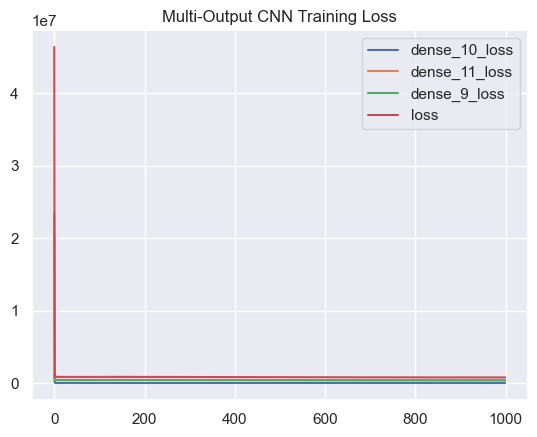

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - dense_10_loss: 5374.0703 - dense_11_loss: 417234.3750 - dense_9_loss: 385950.3750 - loss: 807431.9375
Multi-Output CNN Loss: [742100.8125, 358754.65625, 5825.5986328125, 394423.1875]


In [34]:
if serie_precio_rrp is not None:
    entradas_forecasting_multiple, salidas_forecasting_multiple = dividir_secuencia_forecasting_multiple(conjunto_datos_multivariado, tamanio_ventana)
    numero_caracteristicas_forecasting = entradas_forecasting_multiple.shape[2]
    
    entrada_visible = Input(shape=(tamanio_ventana, numero_caracteristicas_forecasting))
    capa_cnn = Conv1D(64, 2, activation='relu')(entrada_visible)
    capa_cnn = MaxPooling1D()(capa_cnn)
    capa_cnn = Flatten()(capa_cnn)
    capa_cnn = Dense(50, activation='relu')(capa_cnn)
    
    salida_feature1 = Dense(1)(capa_cnn)
    salida_feature2 = Dense(1)(capa_cnn)
    salida_feature3 = Dense(1)(capa_cnn)
    
    modelo_multi_output = Model(inputs=entrada_visible, outputs=[salida_feature1, salida_feature2, salida_feature3])
    modelo_multi_output.compile(optimizer='adam', loss='mse')
    
    salida_objetivo_feature1 = salidas_forecasting_multiple[:, 0].reshape((salidas_forecasting_multiple.shape[0], 1))
    salida_objetivo_feature2 = salidas_forecasting_multiple[:, 1].reshape((salidas_forecasting_multiple.shape[0], 1))
    salida_objetivo_feature3 = salidas_forecasting_multiple[:, 2].reshape((salidas_forecasting_multiple.shape[0], 1))
  
    historial_entrenamiento_multi_output = modelo_multi_output.fit(entradas_forecasting_multiple, 
                                                                   [salida_objetivo_feature1, salida_objetivo_feature2, salida_objetivo_feature3], 
                                                                   epochs=1000, verbose=0)
    pd.DataFrame(historial_entrenamiento_multi_output.history).plot(title='Multi-Output CNN Training Loss')
    plt.grid(True)
    plt.show()
    
    perdida_multi_output = modelo_multi_output.evaluate(entradas_forecasting_multiple, 
                                                          [salida_objetivo_feature1, salida_objetivo_feature2, salida_objetivo_feature3])
    print(f'Multi-Output CNN Loss: {perdida_multi_output}')
else:
    print("Se omite Multi-Output CNN")

### SERIE TEMPORAL MULTIVARIADA

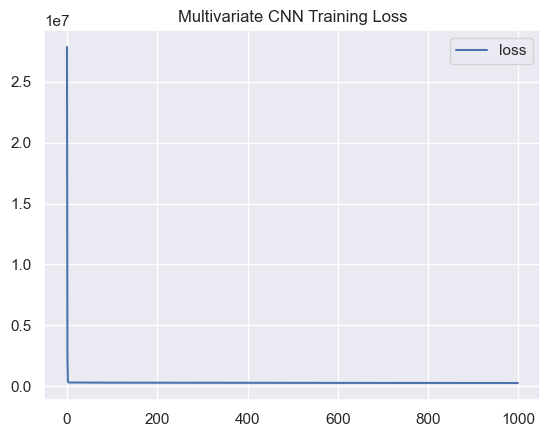

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 300310.9375
Multivariate CNN Loss: 280219.8438


In [35]:
if serie_precio_rrp is not None:
    entradas_multivariadas_temporales, salidas_multivariadas_temporales = dividir_secuencia_multivariada(conjunto_datos_multivariado, tamanio_ventana)
    numero_caracteristicas_temporales = entradas_multivariadas_temporales.shape[2]
    
    modelo_temporal_multivariado = Sequential()
    modelo_temporal_multivariado.add(keras.layers.Input(shape=(tamanio_ventana, numero_caracteristicas_temporales)))
    modelo_temporal_multivariado.add(Conv1D(64, 2, activation='relu'))
    modelo_temporal_multivariado.add(MaxPooling1D())
    modelo_temporal_multivariado.add(Flatten())
    modelo_temporal_multivariado.add(Dense(50, activation='relu'))
    modelo_temporal_multivariado.add(Dense(1))
    modelo_temporal_multivariado.compile(optimizer='adam', loss='mse')
    
    historial_entrenamiento_temporal_multivariado = modelo_temporal_multivariado.fit(entradas_multivariadas_temporales, salidas_multivariadas_temporales, epochs=1000, verbose=0)
    pd.DataFrame(historial_entrenamiento_temporal_multivariado.history).plot(title='Multivariate CNN Training Loss')
    plt.grid(True)
    plt.show()
    
    perdida_modelo_temporal_multivariado = modelo_temporal_multivariado.evaluate(entradas_multivariadas_temporales, salidas_multivariadas_temporales)
    print(f'Multivariate CNN Loss: {perdida_modelo_temporal_multivariado:.4f}')
else:
    print("Se omite Serie Temporal ")

### SERIES PARALELAS

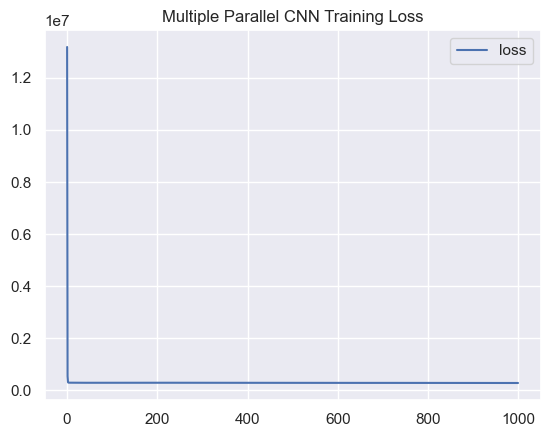

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 287346.2500
Multiple Parallel CNN Loss: 266706.4688


In [36]:
if serie_precio_rrp is not None:
    entradas_series_paralelas, salidas_series_paralelas = dividir_secuencia_forecasting_multiple(conjunto_datos_multivariado, tamanio_ventana)
    numero_caracteristicas_series_paralelas = entradas_series_paralelas.shape[2]
    
    modelo_series_paralelas = Sequential()
    modelo_series_paralelas.add(keras.layers.Input(shape=(tamanio_ventana, numero_caracteristicas_series_paralelas)))
    modelo_series_paralelas.add(Conv1D(64, 2, activation='relu'))
    modelo_series_paralelas.add(MaxPooling1D())
    modelo_series_paralelas.add(Flatten())
    modelo_series_paralelas.add(Dense(50, activation='relu'))
    modelo_series_paralelas.add(Dense(numero_caracteristicas_series_paralelas))
    modelo_series_paralelas.compile(optimizer='adam', loss='mse')
    
    historial_entrenamiento_series_paralelas = modelo_series_paralelas.fit(entradas_series_paralelas, salidas_series_paralelas, epochs=1000, verbose=0)
    pd.DataFrame(historial_entrenamiento_series_paralelas.history).plot(title='Multiple Parallel CNN Training Loss')
    plt.grid(True)
    plt.show()
    
    perdida_series_paralelas = modelo_series_paralelas.evaluate(entradas_series_paralelas, salidas_series_paralelas)
    print(f'Multiple Parallel CNN Loss: {perdida_series_paralelas:.4f}')
else:
    print("Se omiten Series Paralelas")


### DROPOUT

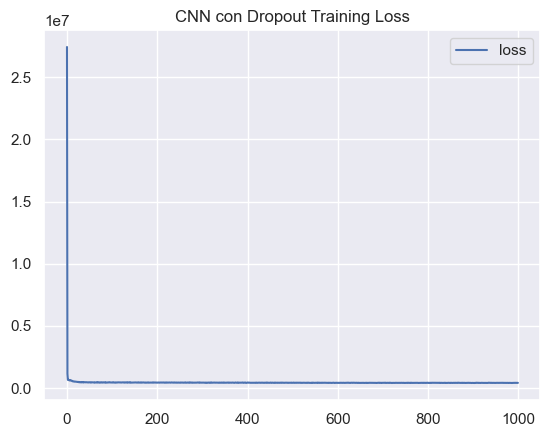

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
CNN con Dropout R² Score: -2.6587


In [37]:
modelo_cnn_dropout = Sequential()
modelo_cnn_dropout.add(keras.layers.Input(shape=(tamanio_ventana, numero_caracteristicas)))
modelo_cnn_dropout.add(Conv1D(64, 2, activation='relu'))
modelo_cnn_dropout.add(Dropout(0.2))
modelo_cnn_dropout.add(MaxPooling1D())
modelo_cnn_dropout.add(Flatten())
modelo_cnn_dropout.add(Dense(50, activation='relu'))
modelo_cnn_dropout.add(Dense(1))
modelo_cnn_dropout.compile(optimizer='adam', loss='mse')

historial_dropout = modelo_cnn_dropout.fit(entradas_univariadas, salidas_univariadas, epochs=1000, verbose=0)
pd.DataFrame(historial_dropout.history).plot(title='CNN con Dropout Training Loss')
plt.grid(True)
plt.show()

predicciones_dropout = modelo_cnn_dropout.predict(entradas_univariadas).flatten()
r2_dropout = r2_score(salidas_univariadas, predicciones_dropout)
print(f'CNN con Dropout R² Score: {r2_dropout:.4f}')

### CNN Bidireccional

Entrenando CNN Bidireccional...


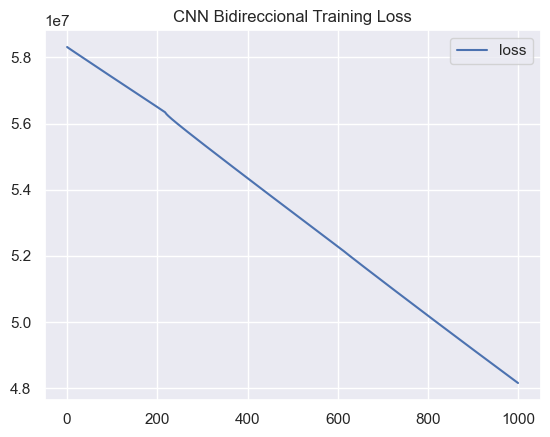

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
CNN Bidireccional R² Score: -72.9336


In [38]:
modelo_cnn_bidireccional = Sequential()
modelo_cnn_bidireccional.add(keras.layers.Input(shape=(tamanio_ventana, numero_caracteristicas)))
modelo_cnn_bidireccional.add(Conv1D(64, 2, activation='relu'))
modelo_cnn_bidireccional.add(MaxPooling1D())
modelo_cnn_bidireccional.add(Bidirectional(LSTM(50)))
modelo_cnn_bidireccional.add(Dense(1))
modelo_cnn_bidireccional.compile(optimizer='adam', loss='mse')

print("Entrenando CNN Bidireccional...")
historial_bidireccional = modelo_cnn_bidireccional.fit(entradas_univariadas, salidas_univariadas, epochs=1000, verbose=0)
pd.DataFrame(historial_bidireccional.history).plot(title='CNN Bidireccional Training Loss')
plt.grid(True)
plt.show()

predicciones_bidireccional = modelo_cnn_bidireccional.predict(entradas_univariadas).flatten()
r2_bidireccional = r2_score(salidas_univariadas, predicciones_bidireccional)
print(f'CNN Bidireccional R² Score: {r2_bidireccional:.4f}')

### Entrenamiento y evaluación

In [39]:
print("\n----- RESUMEN DE RESULTADOS -----")
print(f"CNN Univariada R² Score: {r2_cnn_univariada:.4f}")
if serie_precio_rrp is not None:
    print(f"Multi-Input CNN Loss: {perdida_multi_input:.4f}")
    print(f"Multi-Output CNN Loss: {perdida_multi_output}")
    print(f"Serie Temporal Multivariada (CNN) Loss: {perdida_multi_input:.4f}")
    print(f"Series Paralelas (CNN) Loss: {perdida_series_paralelas:.4f}")
print(f"CNN con Dropout R² Score: {r2_dropout:.4f}")
print(f"CNN Bidireccional R² Score: {r2_bidireccional:.4f}")


----- RESUMEN DE RESULTADOS -----
CNN Univariada R² Score: 0.4156
Multi-Input CNN Loss: 286184.6562
Multi-Output CNN Loss: [742100.8125, 358754.65625, 5825.5986328125, 394423.1875]
Serie Temporal Multivariada (CNN) Loss: 286184.6562
Series Paralelas (CNN) Loss: 266706.4688
CNN con Dropout R² Score: -2.6587
CNN Bidireccional R² Score: -72.9336


### Visualización

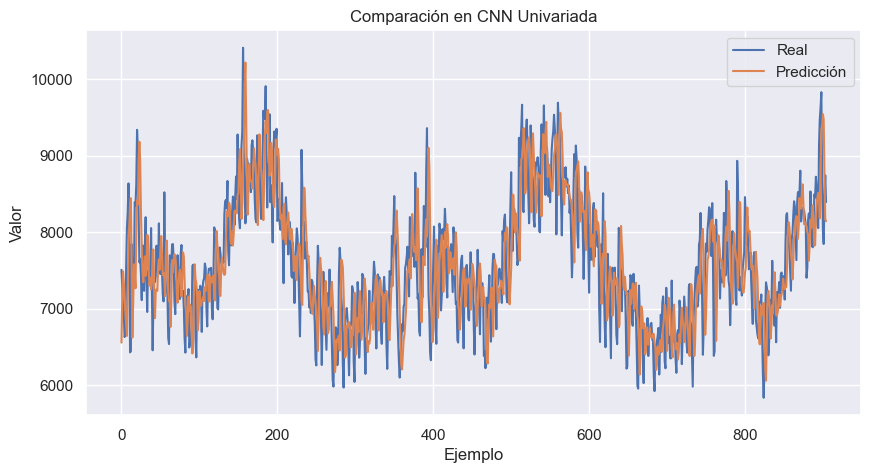

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(salidas_univariadas, label='Real')
plt.plot(predicciones_cnn_univariada, label='Predicción')
plt.title('Comparación en CNN Univariada')
plt.xlabel('Ejemplo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

### Evaluación

In [41]:
print("\n----- EVALUACIÓN FINAL DE TODOS LOS MODELOS -----")
print(f"CNN Univariada: R² Score = {r2_cnn_univariada:.4f}")
if serie_precio_rrp is not None:
    print(f"Multi-Input CNN: Loss = {perdida_multi_input:.4f}")
    print(f"Multi-Output CNN: Loss = {perdida_multi_output}")
    print(f"Serie Temporal Multivariada (CNN): Loss = {perdida_multi_input:.4f}")
    print(f"Series Paralelas (CNN): Loss = {perdida_series_paralelas:.4f}")
print(f"CNN con Dropout: R² Score = {r2_dropout:.4f}")
print(f"CNN Bidireccional: R² Score = {r2_bidireccional:.4f}")


----- EVALUACIÓN FINAL DE TODOS LOS MODELOS -----
CNN Univariada: R² Score = 0.4156
Multi-Input CNN: Loss = 286184.6562
Multi-Output CNN: Loss = [742100.8125, 358754.65625, 5825.5986328125, 394423.1875]
Serie Temporal Multivariada (CNN): Loss = 286184.6562
Series Paralelas (CNN): Loss = 266706.4688
CNN con Dropout: R² Score = -2.6587
CNN Bidireccional: R² Score = -72.9336


### Conclusiones
Podemos notar que en CNN univariada, dropout y bidireccional tuvimos una R2 muy mala. 
Los valores negativos de R² Score en algunos casos sugieren que ciertos modelos están sobreajustando o simplemente no logran generalizar correctamente.
Se observa que modelos demasiado complejos tienden a perder capacidad de generalización, mientras que los más simples tampoco logran un ajuste óptimo. Los modelos con una estructura más equilibrada, como el de múltiples entradas y múltiples salidas, mostraron un mejor desempeño.

### Código de solución estudiante Juan Pablo Blanco